In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=100)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy 

In [20]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

80

In [21]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [22]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e5faf8897313982996a3d5636415ce23


In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | port alfred
Processing Record 2 of Set 13 | rikitea
Processing Record 3 of Set 13 | avarua
Processing Record 4 of Set 13 | punta arenas
Processing Record 5 of Set 13 | port lincoln
Processing Record 6 of Set 13 | dikson
Processing Record 7 of Set 13 | niamey
Processing Record 8 of Set 13 | vaini
Processing Record 9 of Set 13 | albany
Processing Record 10 of Set 13 | sao joao da barra
Processing Record 11 of Set 13 | ushuaia
Processing Record 12 of Set 13 | hobart
Processing Record 13 of Set 13 | busselton
Processing Record 14 of Set 13 | atuona
Processing Record 15 of Set 13 | puerto ayora
Processing Record 16 of Set 13 | daoukro
Processing Record 17 of Set 13 | mataura
Processing Record 18 of Set 13 | dillon
Processing Record 19 of Set 13 | harrai
Processing Record 20 of Set 13 | umarkot
Processing Record 21 of Set 13 | bethel
Processing Record 22 of Set 13 | nizhneyansk
City not found. Skippin

Processing Record 34 of Set 16 | illoqqortoormiut
City not found. Skipping...
Processing Record 35 of Set 16 | foumbot
Processing Record 36 of Set 16 | lima
Processing Record 37 of Set 16 | east london
Processing Record 38 of Set 16 | santa rosa
Processing Record 39 of Set 16 | lucea
Processing Record 40 of Set 16 | cabo san lucas
Processing Record 41 of Set 16 | andros town
Processing Record 42 of Set 16 | qena
Processing Record 43 of Set 16 | agirish
Processing Record 44 of Set 16 | paamiut
Processing Record 45 of Set 16 | poum
Processing Record 46 of Set 16 | yumen
Processing Record 47 of Set 16 | deputatskiy
Processing Record 48 of Set 16 | hearst
Processing Record 49 of Set 16 | klaksvik
Processing Record 50 of Set 16 | mudgee
Processing Record 1 of Set 17 | snezhnogorsk
Processing Record 2 of Set 17 | namatanai
Processing Record 3 of Set 17 | amel
Processing Record 4 of Set 17 | margate
Processing Record 5 of Set 17 | huancabamba
Processing Record 6 of Set 17 | umm lajj
Processin

Processing Record 22 of Set 20 | lufilufi
Processing Record 23 of Set 20 | faya
Processing Record 24 of Set 20 | barcelona
Processing Record 25 of Set 20 | kapit
Processing Record 26 of Set 20 | college
Processing Record 27 of Set 20 | tommot
Processing Record 28 of Set 20 | cozumel
Processing Record 29 of Set 20 | vila velha
Processing Record 30 of Set 20 | ndele
Processing Record 31 of Set 20 | polunochnoye
Processing Record 32 of Set 20 | kisangani
Processing Record 33 of Set 20 | barabinsk
Processing Record 34 of Set 20 | foggia
Processing Record 35 of Set 20 | ponta do sol
Processing Record 36 of Set 20 | carballo
Processing Record 37 of Set 20 | praia
Processing Record 38 of Set 20 | ducheng
Processing Record 39 of Set 20 | lakatoro
Processing Record 40 of Set 20 | itarema
Processing Record 41 of Set 20 | beira
Processing Record 42 of Set 20 | jining
Processing Record 43 of Set 20 | hokitika
Processing Record 44 of Set 20 | abha
Processing Record 45 of Set 20 | diamantino
Process

Processing Record 10 of Set 24 | zaozerne
Processing Record 11 of Set 24 | sawai madhopur
Processing Record 12 of Set 24 | makueni
Processing Record 13 of Set 24 | leningradskiy
Processing Record 14 of Set 24 | san cristobal
Processing Record 15 of Set 24 | nemuro
Processing Record 16 of Set 24 | sibolga
Processing Record 17 of Set 24 | iraray
Processing Record 18 of Set 24 | lillooet
Processing Record 19 of Set 24 | hambantota
Processing Record 20 of Set 24 | baherden
Processing Record 21 of Set 24 | port said
Processing Record 22 of Set 24 | sillod
Processing Record 23 of Set 24 | yeppoon
Processing Record 24 of Set 24 | kungalv
Processing Record 25 of Set 24 | savannah bight
Processing Record 26 of Set 24 | cancun
Processing Record 27 of Set 24 | nantucket
Processing Record 28 of Set 24 | boguchar
Processing Record 29 of Set 24 | aleksandrovsk-sakhalinskiy
Processing Record 30 of Set 24 | dunedin
Processing Record 31 of Set 24 | bombay
Processing Record 32 of Set 24 | bangad
Process

In [10]:
len(city_data)

572

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.59,26.89,63.00,97,52,1.99,ZA,2020-04-15 07:21:20
1,Rikitea,-23.12,-134.97,75.96,65,34,4.68,PF,2020-04-15 07:21:20
2,Avarua,-21.21,-159.78,75.20,78,86,3.36,CK,2020-04-15 07:18:24
3,Punta Arenas,-53.15,-70.92,46.40,87,40,6.93,CL,2020-04-15 07:21:21
4,Port Lincoln,-34.73,135.87,77.92,30,100,18.37,AU,2020-04-15 07:21:21
5,Dikson,73.51,80.55,12.09,91,40,8.93,RU,2020-04-15 07:21:22
6,Niamey,13.51,2.11,84.20,21,26,6.93,NE,2020-04-15 07:21:22
7,Vaini,-21.20,-175.20,73.40,94,20,3.36,TO,2020-04-15 07:21:22
8,Albany,42.60,-73.97,41.00,44,90,13.87,US,2020-04-15 07:19:40
9,Sao Joao Da Barra,-21.64,-41.05,74.01,85,53,12.64,BR,2020-04-15 07:21:22


In [12]:
# -- New Column Order 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2020-04-15 07:21:20,-33.59,26.89,63.00,97,52,1.99
1,Rikitea,PF,2020-04-15 07:21:20,-23.12,-134.97,75.96,65,34,4.68
2,Avarua,CK,2020-04-15 07:18:24,-21.21,-159.78,75.20,78,86,3.36
3,Punta Arenas,CL,2020-04-15 07:21:21,-53.15,-70.92,46.40,87,40,6.93
4,Port Lincoln,AU,2020-04-15 07:21:21,-34.73,135.87,77.92,30,100,18.37
5,Dikson,RU,2020-04-15 07:21:22,73.51,80.55,12.09,91,40,8.93
6,Niamey,NE,2020-04-15 07:21:22,13.51,2.11,84.20,21,26,6.93
7,Vaini,TO,2020-04-15 07:21:22,-21.20,-175.20,73.40,94,20,3.36
8,Albany,US,2020-04-15 07:19:40,42.60,-73.97,41.00,44,90,13.87
9,Sao Joao Da Barra,BR,2020-04-15 07:21:22,-21.64,-41.05,74.01,85,53,12.64


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.strftime("%x")
today

'04/15/20'

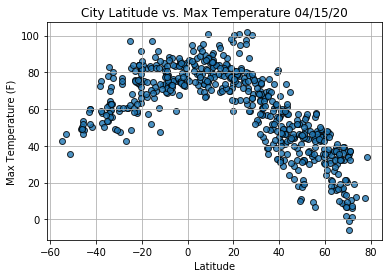

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

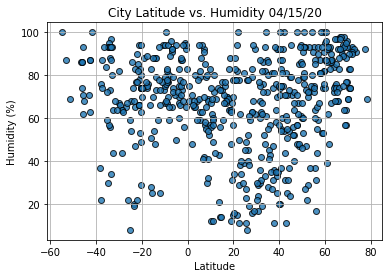

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

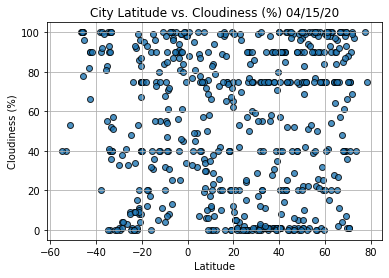

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

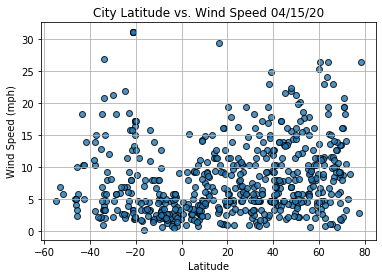

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                       Atuona
Country                        PF
Date          2020-04-15 07:21:23
Lat                          -9.8
Lng                       -139.03
Max Temp                    82.53
Humidity                       67
Cloudiness                     32
Wind Speed                   4.97
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4      False
       ...  
567     True
568     True
569    False
570     True
571     True
Name: Lat, Length: 572, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,Dikson,RU,2020-04-15 07:21:22,73.51,80.55,12.09,91,40,8.93
6,Niamey,NE,2020-04-15 07:21:22,13.51,2.11,84.20,21,26,6.93
8,Albany,US,2020-04-15 07:19:40,42.60,-73.97,41.00,44,90,13.87
15,Daoukro,CI,2020-04-15 07:21:24,7.06,-3.96,73.81,92,36,2.82
17,Dillon,US,2020-04-15 07:21:24,34.42,-79.37,69.01,100,75,4.70
...,...,...,...,...,...,...,...,...,...
566,Champerico,GT,2020-04-15 07:23:23,14.30,-91.92,82.38,73,99,6.31
567,Aras,ES,2020-04-15 07:23:23,42.56,-2.36,59.00,71,85,8.05
568,Mersing,MY,2020-04-15 07:23:23,2.43,103.84,91.40,66,40,9.17
570,Bermeo,ES,2020-04-15 07:23:24,43.42,-2.72,62.60,55,25,17.22


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)] 

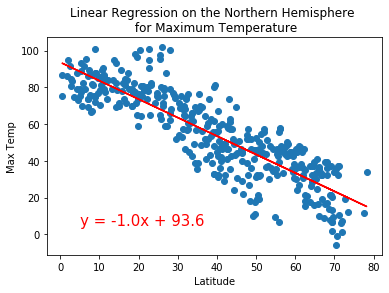

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp', 
                       (5,5))


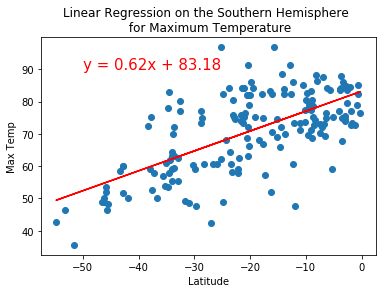

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

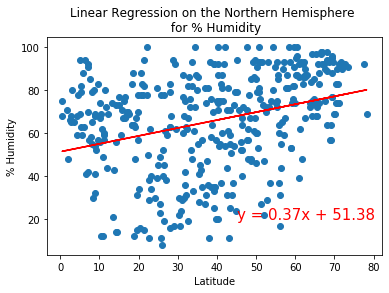

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,20))

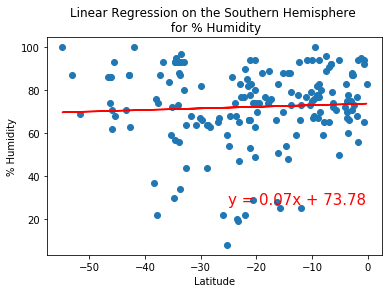

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,27))

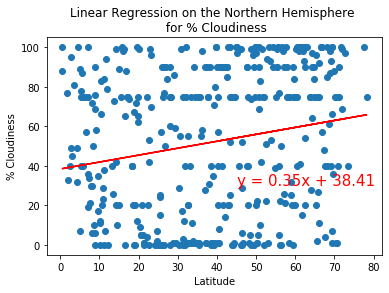

In [30]:
# -- Skill Drill 
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,30))

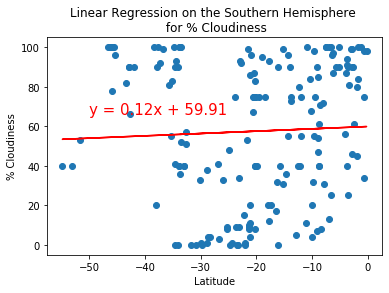

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness", '% Cloudiness',(-50,66))

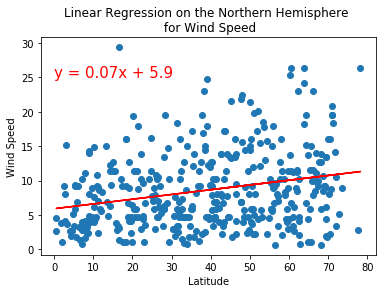

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',
                       (0,25))

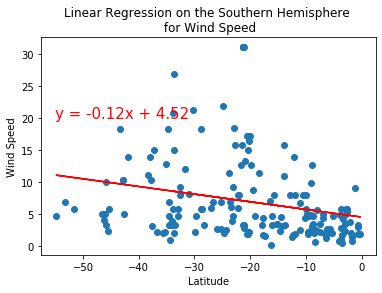

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',
                       (-55,20))